<a href="https://colab.research.google.com/github/damarismuli/Moringa_Data_Science_Core_W2_Independent_Project_2022_03_Damaris_Muli_Financial_Inclusion_Python/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2022_03_Damaris_Muli_Financial_Inclusion_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis

1. Defining the Question

a) Specifying the Question

How we can predict which individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

b) Defining the Metric for Success

Being able to determine individuals who are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

c) Understanding the context

Financial inclusion means that individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.

It aims to bring in digital financial solutions for the economically underprivileged people of the nation. It also intends to bring in mobile banking or financial services in order to reach the poorest people living in extremely remote areas of the country.

Being able to have access to a transaction account is a first step toward broader financial inclusion since a transaction account allows people to store money, and send and receive payments.

Moving from access to account to account usage is the next step for countries where 80% or more of the population have accounts 

However, close to one-third of adults – 1.7 billion – are still unbanked, according to the latest Findex data.

About half of unbanked people include women poor households in rural areas or out of the workforce.

Countries with high mobile money account ownership have less gender inequality.

d) Recording the Experimental Design

To come up with the end goal(Data Analysis).The following steps will be followed:
1.Explore
2.Clean/Verify
3.Document.

e) Data Relevance

Some of the information in my data that are relevance is information about individuals whether they have a Bank account or not to aid in 
determining  individuals who are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

2. Importing Libraries

In [3]:
# Importing Pandas
# 
import pandas as pd

In [4]:
# Importing Numpy
#
import numpy as np

In [5]:
# Importing Seaborn
#
import seaborn as sns

In [6]:
# Importing Matplotlib
#
import matplotlib.pyplot as plt

3. Reading the Data

In [7]:
# Loading the Data from the source i.e. csv
# Dataset url =  http://bit.ly/FinancialDataset 
financial_df=pd.read_csv("http://bit.ly/FinancialDataset")

4. Checking the Data

In [8]:
# Determining the no. of records in our dataset
financial_df.shape

(23524, 13)

In [9]:
# Previewing the top of our dataset
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
# Previewing the bottom of our dataset
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [11]:
# Checking whether each column has an appropriate datatype
financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [12]:
financial_df['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

5. Tidying the Dataset

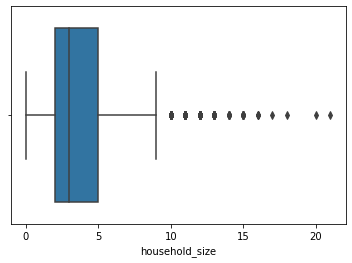

In [13]:
# Checking for Outliers
#
sns.boxplot(x=financial_df['household_size'])

#below plot shows even points between 10 to 20,
 #These are outliers as they are not included in the box of 
 #other observation i.e no where near the quartiles.

In [14]:

# Checking for Anomalies
#
q1_household_size = financial_df['household_size'].quantile(.25)
q3_household_size = financial_df['household_size'].quantile(.75)

iqr_household_size = q3_household_size - q1_household_size

print(iqr_household_size)


3.0


In [15]:
# Identifying the Missing Data
financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [16]:
# Dealing with the Missing Data
financial_df= financial_df.dropna()
financial_df.isnull().sum()


country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

6. Exploratory Data Analysis

6.1  Univariate Analysis

i.Scatter Plot

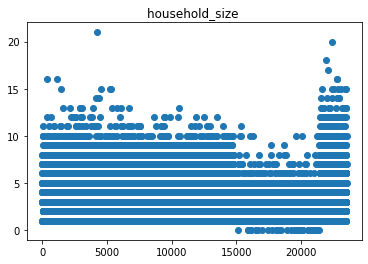

In [17]:
# Ploting the univariate summaries and recording our observations

plt.title('household_size ')
plt.scatter(financial_df.index,financial_df['household_size'])
plt.show()


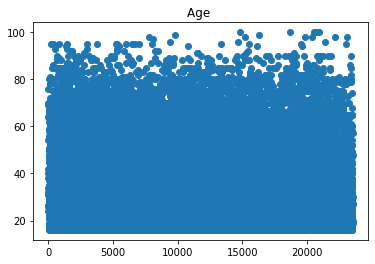

In [ ]:
# Ploting the univariate summaries and recording our observations
plt.title('Age ')
plt.scatter(financial_df.index,financial_df['Age'])
plt.show()


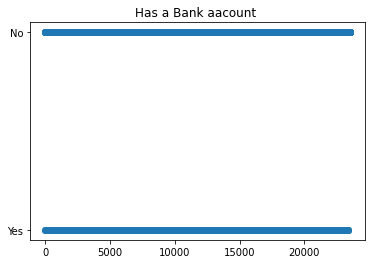

In [20]:
# Ploting the univariate summaries and recording our observations
plt.title('Has a Bank aacount ')
plt.scatter(financial_df.index,financial_df['Has a Bank account'])
plt.show()


6.2. Bivariate Analysis


Text(0, 0.5, 'Has a Bank account')

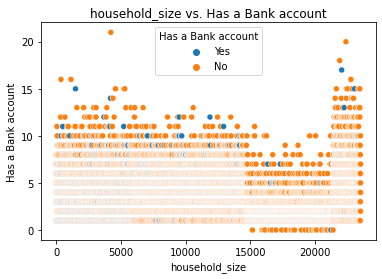

In [22]:
# Ploting the bivariate summaries and recording our observations
#create scatterplot of household_size vs.Has a bank account
sns.scatterplot(x=financial_df.index, y=financial_df['household_size'], hue=financial_df['Has a Bank account'])
plt.title('household_size vs. Has a Bank account')
plt.xlabel('household_size')
plt.ylabel('Has a Bank account')

Text(0, 0.5, 'Has a Bank account')

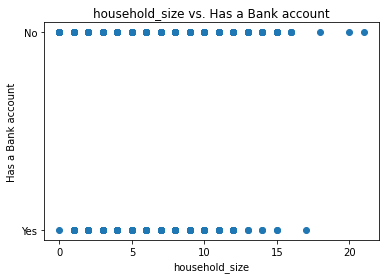

In [ ]:
# Ploting the bivariate summaries and recording our observations
#create scatterplot of household_size vs.Respondent Age
financial_df.rename(columns = {'Has a Bank account':'account'}, inplace = True)
#create scatterplot of household_size vs. year
plt.scatter(financial_df.household_size, financial_df.account)
plt.title('household_size vs. Has a Bank account')
plt.xlabel('household_size')
plt.ylabel('Has a Bank account')

Text(0, 0.5, 'Respondent Age')

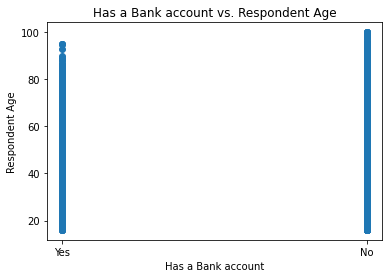

In [ ]:
# Ploting the bivariate summaries and recording our observations
#create scatterplot of Has a Bank account vs.Respondent Age
financial_df.rename(columns = {'Respondent Age':'Age'}, inplace = True)
#create scatterplot of household_size vs. Respondent Age
plt.scatter(financial_df.account, financial_df.Age)
plt.title('Has a Bank account vs. Respondent Age')
plt.xlabel('Has a Bank account')
plt.ylabel('Respondent Age')



Text(0, 0.5, 'Has a Bank account')

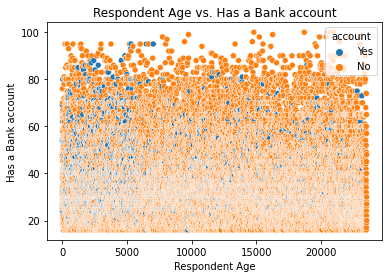

In [ ]:
# Ploting the bivariate summaries and recording our observations
#create another scatterplot of household_size vs.Has a bank account
sns.scatterplot(x=financial_df.index, y=financial_df['Age'], hue=financial_df['account'])
plt.title('Respondent Age vs. Has a Bank account')
plt.xlabel('Respondent Age')
plt.ylabel('Has a Bank account')

Text(0, 0.5, 'Year')

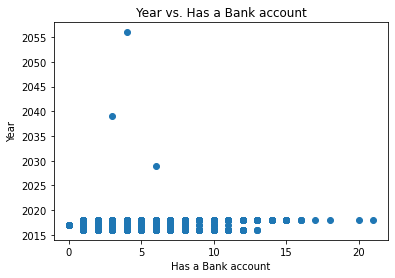

In [ ]:

#create scatterplot of household_size vs. year
plt.scatter(financial_df.household_size, financial_df.year)
plt.title('Year vs. Has a Bank account')
plt.xlabel('Has a Bank account')
plt.ylabel('Year')

In [ ]:
#create correlation matrix
financial_df.corr()
#The correlation coefficient turns out to be -0.0493,-0.0196and -0.120 respective. 
#This indicates a weak negative correlation between year and household_size ,year and age and strong negative correlationbetween household_size and age .

,year,household_size,Age
year,1.000000,-0.048902,-0.019062
household_size,-0.048902,1.000000,-0.119709
Age,-0.019062,-0.119709,1.000000


In [ ]:
import statsmodels.api as sm

In [ ]:
#define response variable
y = financial_df['household_size']

#define explanatory variable
x = financial_df[['Age']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         household_size   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     339.3
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           3.03e-75
Time:                        16:12:50   Log-Likelihood:                -52204.
No. Observations:               23343   AIC:                         1.044e+05
Df Residuals:                   23341   BIC:                         1.044e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3301      0.038    114.414      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The fitted regression equation turns out to be:

household_size =  4.3301 + -0.0165 *(age)

This tells us that each additional age is associated with an average decrease of -0.0165 in household_size

We can also use the fitted regression equation to predict the household_size based on age.



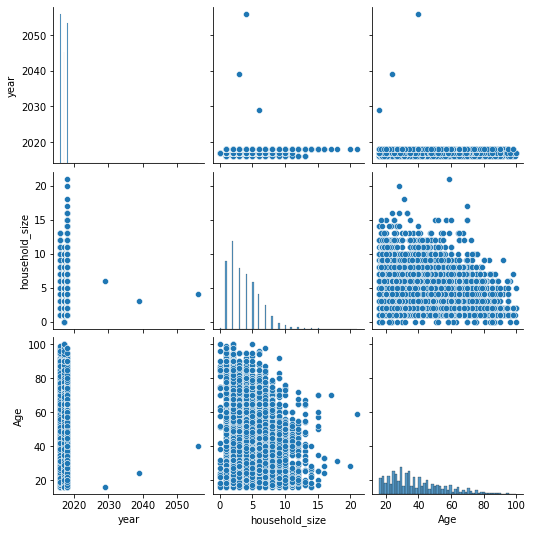

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(financial_df)
plt.show()

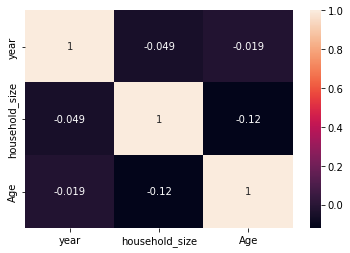

In [ ]:
sns.heatmap(financial_df.corr(),annot=True)
plt.show()

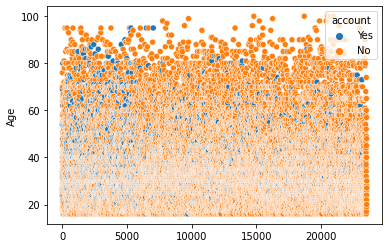

In [ ]:
sns.scatterplot(x=financial_df.index, y=financial_df['Age'], hue=financial_df['account'])

6.3 Multivariate Analysis

Discriminant Analysis

In [35]:
# dividing  data into labels and feature set. 
#
X = financial_df.iloc[:, 1:6:7].values
y = financial_df.iloc[:, 7].values

In [36]:
#The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
# Peforming LDA
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [38]:
#Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [39]:
#evaluating performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 0.03983%

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.03983722424502035


Principal Component Analysis

In [41]:
# Applying PCA
# performing PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [43]:
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 100% variance. 


In [45]:
#Using 1 Principal Component
# 1 principal component to train our algorithm. 
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
#Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [47]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# resulting in 3.983% accuracy.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.03983722424502035


Factor analysis

In [48]:
# Before we perform factor analysis,weyou need to evaluate the “factorability” of our dataset. 
# Factorability means "can we found the factors in the dataset?". 
# There are two methods to check the factorability or sampling adequacy:
# - Bartlett’s Test
# - Kaiser-Meyer-Olkin Test
# ---
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
# we should not employ a factor analysis.
# ---

# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(financial_df)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(407.4556452022853, 1.7639790552489393e-46)

7. Implementing the Solution

In [ ]:
#Things to be done practically to achieve the end goal
#For this Independent project, the solution will not be  implemented  rather we've used discriminant factor analysis  and PCA to get the accuracy of our model.

8. Challenging the solution

(array([9.036e+03, 6.714e+03, 4.745e+03, 2.118e+03, 5.450e+02, 1.320e+02,
        3.400e+01, 1.500e+01, 2.000e+00, 2.000e+00]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

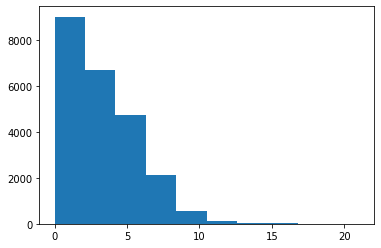

In [ ]:
#Different Approaches to the solution
plt.hist(financial_df['household_size'])

(array([4773., 5430., 4678., 2761., 2150., 1720.,  956.,  636.,  188.,
          51.]),
 array([ 16. ,  24.4,  32.8,  41.2,  49.6,  58. ,  66.4,  74.8,  83.2,
         91.6, 100. ]),
 <a list of 10 Patch objects>)

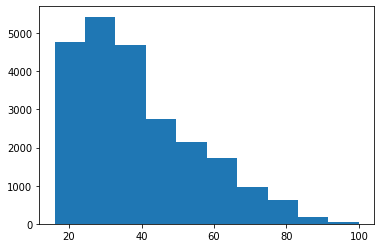

In [ ]:
plt.hist(financial_df['Age'])

9. Follow up questions

Right data was provided which was used to perform the analysis.
I was able to come up with a models which visualizes Respondent Age against Has a Bank account nd Household-size against Has a Bank account.

## b. Do we need other data to answer our question?

No.
The provided data was adequate to handle the question.